# Modules
To analyse data in Python, we will be using an external module called [SciPy](https://www.scipy.org/). We also need to import numpy and pandas, because we will be analysing data stored in pandas dataframes. Finally, we will import some plotnine modules to allow us to visualise the data that we are analysing.

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from plotnine import ggplot, aes, theme, geom_histogram, geom_point, geom_violin, geom_boxplot, element_text

# Data
To demonstrate the data analysis functionality of Python, we will use the metabric dataset. Some of the functions we will use do not handle missing data, so we will remove any rows for the dataset where data is missing. As we saw in week 3, we can use the **describe()** method to generate summary statistics for this dataset:

In [3]:
metabric = pd.read_csv("../data/metabric_clinical_and_expression_data.csv").dropna()
metabric.describe()

,Cohort,Age_at_diagnosis,Survival_time,Tumour_size,Tumour_stage,Neoplasm_histologic_grade,Lymph_nodes_examined_positive,Lymph_node_status,Nottingham_prognostic_index,Mutation_count,ESR1,ERBB2,PGR,TP53,PIK3CA,GATA3,FOXA1,MLPH
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,2.207850,60.412721,126.239518,26.094112,1.756467,2.445138,1.873327,1.626227,4.123553,5.467440,9.600854,10.770958,6.238728,6.191980,5.950108,9.530585,10.839721,11.383495
std,0.956449,13.012218,77.295543,15.102221,0.622865,0.635888,3.830332,0.739443,1.059818,3.859249,2.093524,1.317631,1.020860,0.389334,0.310095,1.468576,1.687979,1.630174
min,1.000000,21.930000,0.100000,1.000000,1.000000,1.000000,0.000000,1.000000,2.002000,1.000000,5.217238,7.281883,4.945672,5.225320,5.158697,5.401414,5.289602,5.323652
25%,1.000000,50.820000,60.133333,17.000000,1.000000,2.000000,0.000000,1.000000,3.052000,3.000000,8.205776,9.981831,5.422349,5.936286,5.730861,8.809316,10.878608,11.071585
50%,2.000000,60.930000,116.433333,22.000000,2.000000,3.000000,0.000000,1.000000,4.046000,5.000000,10.220349,10.532638,5.864217,6.176018,5.931565,9.917441,11.365047,11.857401
75%,3.000000,69.700000,188.733333,30.000000,2.000000,3.000000,2.000000,2.000000,5.046000,7.000000,11.202333,11.149977,6.902124,6.439989,6.134401,10.554370,11.749098,12.374549
max,5.000000,96.290000,337.033333,180.000000,4.000000,3.000000,41.000000,3.000000,6.360000,46.000000,13.265184,14.643900,9.932115,7.769900,8.708396,12.812082,13.127682,14.432001


# Statistical tests

## Tests for normality
When we are deciding which statistical test to use in our analysis, we often need to work out whether the data follows a normal distribution or not, as some tests (e.g. t-test) assume that our data are normally distributed. We can test whether a dataset follows a normal distribution by using the Kolmogorov-Smirnov test. For example, the age at diagnosis looks like it could be normally distributed:

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 21'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


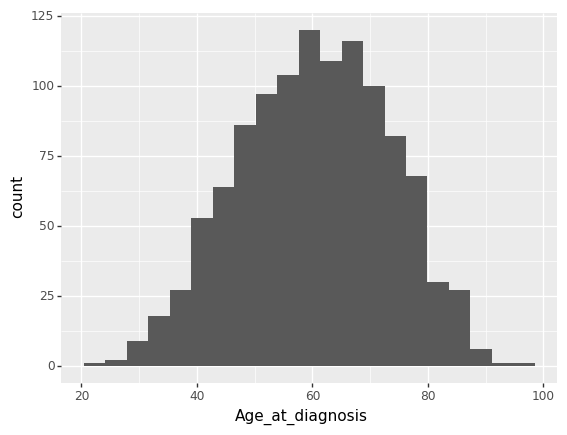

<ggplot: (-9223371879137589260)>

In [5]:
(
ggplot(metabric, aes("Age_at_diagnosis"))
    + geom_histogram()
)

The Kolmogorov-Smirnov test confirms that we cannot reject the hypothesis that it is normally distributed:

In [53]:
sp.stats.kstest(metabric["Age_at_diagnosis"], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In SciPy, the results of most tests are returned as an object. When printed directly to screen this is not very pretty and hard to interpret,  as we can see above. When running the test, we can assign the results object to a variable, and then access the attributes of the results object to print the results in a clearer format:

In [59]:
# run the test and assign the result to a variable
age_diagnosis_ks = sp.stats.kstest(metabric["Age_at_diagnosis"], "norm")
# print the results by retrieving attributes from the result object 
print("Age at diagnosis Kolmogorov-Smirnov test:")
print("p value = {}".format(age_diagnosis_ks.pvalue))

Age at diagnosis Kolmogorov-Smirnov test:
p value = 0.0


## Correlation
We often want to test whether two continuous variables are related to each other, and we can do this by calculating a correlation. For example, there appears to be a relationship between the expression of the ESR1 gene and the GATA3 gene:

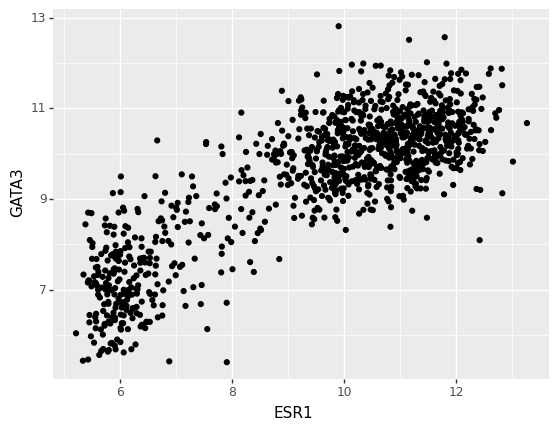

<ggplot: (-9223371866336140352)>

In [3]:
(
ggplot(metabric, aes("ESR1", "GATA3"))
    + geom_point()
)

For normally distributed data, we can use calculate the Pearson's correlation using the **pearsonr()** function. **pearsonr()** returns the results as a tuple rather than an object, so we need to access the coefficient and p value using indexing:

In [57]:
ESR1_GATA3_pearson = sp.stats.pearsonr(metabric["ESR1"], metabric["GATA3"])
print("Pearson correlation between ESR1 & GATA3:")
print("coefficient = {}".format(ESR1_GATA3_pearson[0]))
print("p value = {}".format(ESR1_GATA3_pearson[1]))

Pearson correlation between ESR1 & GATA3:
coefficient = 0.8282016709899257
p value = 1.134210930536034e-283


For data that is not normally distributed, we can calculate the Spearman rank correlation using the **spearmanr()** function. Again, we access the results using indexing:

In [58]:
size_mutation_spearman = sp.stats.spearmanr(metabric["Tumour_size"], metabric["Mutation_count"])
print("Spearman rank correlation between tumour size and mutation count:")
print("coefficient = {}".format(size_mutation_spearman[0]))
print("p value = {}".format(size_mutation_spearman[1]))

Spearman rank correlation between tumour size and mutation count:
coefficient = 0.0070724805027381175
p value = 0.8130176386734044


## T-test
To test whether the mean value of a continuous variable is significantly different between two different groups, we can use the t-test for normally distributed data. For example, age at diagnosis appears to be lower for ER-negative tumours compared with ER-positive tumours:

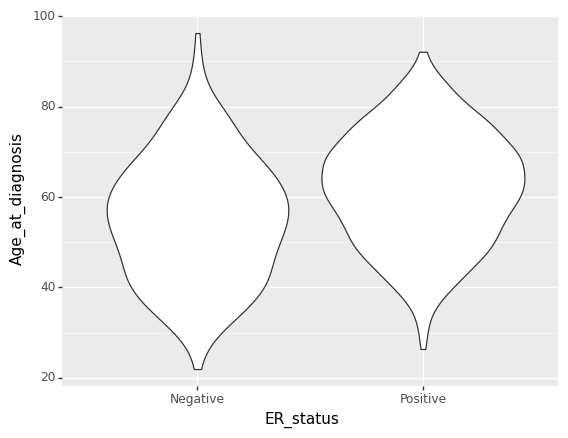

<ggplot: (-9223371879135783076)>

In [42]:
(
ggplot(metabric, aes("ER_status", "Age_at_diagnosis"))
    + geom_violin()
)

We can use the **ttest_ind()** function to carry out the t test, which confirms that we can reject the null hypothesis that age at diagnosis is not different between ER positive and negative tumours. Note that **ttest_ind()** takes two arguments, which are arrays containing the values of the two groups. Rather than extracting these values and assigning them to separate variables, we can do the data extraction within the function call:

In [60]:
ER_age_t = sp.stats.ttest_ind(
    # select samples with Negative ER_status and extract the Age_at_diagnosis values
    metabric[metabric["ER_status"]=="Negative"]["Age_at_diagnosis"],
    # select samples with Positive ER_status and extract the Age_at_diagnosis values
    metabric[metabric["ER_status"]=="Positive"]["Age_at_diagnosis"]
)
print("t test of age at diagnosis for ER_status Negative vs Positive:")
print("t = {}".format(ER_age_t.statistic))
print("p = {}".format(ER_age_t.pvalue))

t test of age at diagnosis for ER_status Negative vs Positive:
t = -7.543060668278905
p = 9.471433611351617e-14


If we have data that is not normally distributed we may want to use the Mann-Whitney U test, also known as the Wilcoxon rank-sum test, which is the non-parametric equivalent of the t test. For example, survival time does not follow a normal distribution, but it still appears to be different between ER positive and ER negative tumours:

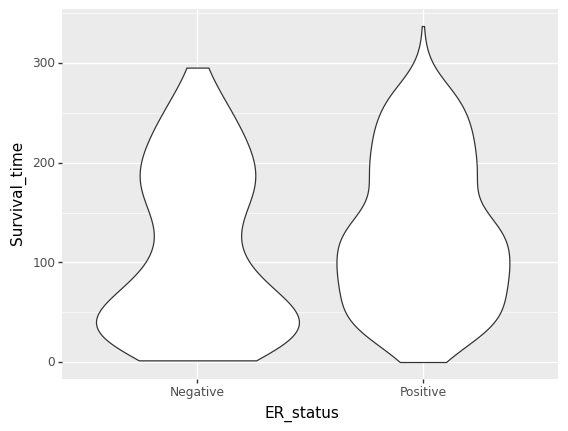

<ggplot: (-9223371879137560864)>

In [46]:
(
ggplot(metabric, aes("ER_status", "Survival_time"))
    + geom_violin()
)

We can use the **mannwhitneyu()** function to run the Mann-Whitney U test, which confirms that we can reject the null hypothesis that age at diagnosis is not different between ER positive and negative tumours. Again, we are subsetting and selecting the data within the function call:

In [61]:
ER_survival_MWU = sp.stats.mannwhitneyu(
    # select samples with Negative ER_status and extract the Age_at_diagnosis values
    metabric[metabric["ER_status"]=="Negative"]["Age_at_diagnosis"],
    # select samples with Positive ER_status and extract the Age_at_diagnosis values
    metabric[metabric["ER_status"]=="Positive"]["Age_at_diagnosis"]
)
print("Mann-Whitney U test of survival time for ER_status Negative vs Positive:")
print("f = {}".format(ER_survival_MWU.statistic))
print("p = {}".format(ER_age_t.pvalue))

Mann-Whitney U test of survival time for ER_status Negative vs Positive:
f = 77360.0
p = 9.471433611351617e-14


## ANOVA
If we want to test for a difference in the mean value of a continuous variable between >2 groups simultaneously, we can use the analysis of variance (ANOVA). For example, we may want to test for differences between survival times between different cancer types, which appear to be different:

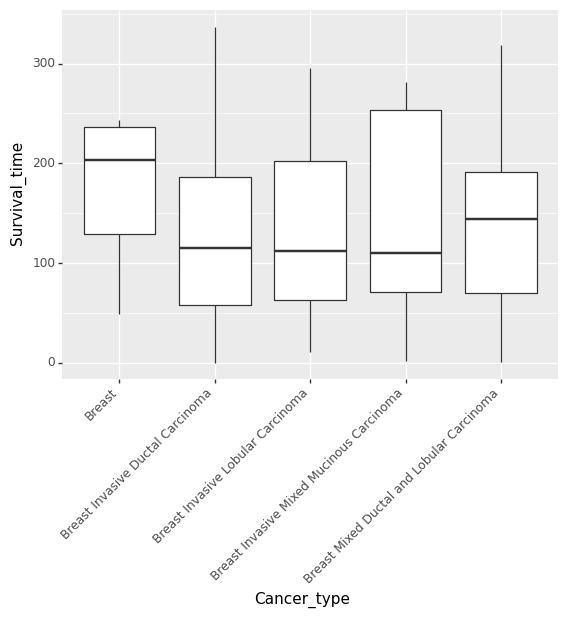

<ggplot: (-9223371879136834176)>

In [70]:
(
ggplot(metabric, aes("Cancer_type", "Survival_time"))
    + geom_boxplot()
    + theme(axis_text_x = element_text(angle=45, hjust=1))
)

We can use the **f_oneway()** function to run ANOVA, which shows that we cannot reject the null hypothesis that there is no difference in survival time between cancer types:

In [78]:
type_survival_anova = sp.stats.f_oneway(
    # select samples with Breast cancer and extract the Survival_time values
    metabric[metabric["Cancer_type"]=="Breast"]["Survival_time"],
    # select samples with Breast cancer and extract the Survival_time values
    metabric[metabric["Cancer_type"]=="Breast Invasive Ductal Carcinoma"]["Survival_time"],
    # select samples with Breast cancer and extract the Survival_time values
    metabric[metabric["Cancer_type"]=="Breast Invasive Lobular Carcinoma"]["Survival_time"]
)
print("ANOVA of survival time for different cancer types:")
print("f = {}".format(type_survival_anova.statistic))
print("p = {}".format(type_survival_anova.pvalue))

ANOVA of survival time for different cancer types:
f = 1.3798530485937566
p = 0.25211254882000633


## Chi-square
If we have two categorical variables of interest, and we want to test whether the status of one variable is linked to the status of the other, we can use the Chi-square test. For example, we may want to test whether the ER status of a tumour (Positive or Negative) is linked to the PR status (Positive or Negative). First, we need to format the data into a contingency table, containing counts of positive and negative values for ER and PR:

In [104]:
# count the number of tumours for each ER-PR status combination
ERpos_PRpos = metabric[(metabric["ER_status"]=="Positive") & (metabric["PR_status"]=="Positive")].shape[0]
ERpos_PRneg = metabric[(metabric["ER_status"]=="Positive") & (metabric["PR_status"]=="Negative")].shape[0]
ERneg_PRpos = metabric[(metabric["ER_status"]=="Negative") & (metabric["PR_status"]=="Positive")].shape[0]
ERneg_PRneg = metabric[(metabric["ER_status"]=="Negative") & (metabric["PR_status"]=="Negative")].shape[0]
# make a contingency table for counts
ER_PR_contingency = [
    [ERpos_PRpos, ERpos_PRneg],
    [ERneg_PRpos, ERneg_PRneg]
]
ER_PR_contingency

[[573, 296], [11, 241]]

Now, we use the **chi2_contingency()** function to run the Chi-square test, and assign the results to a variable. This shows that we can reject the null hypothesis that ER and PR status are independent. The results are returned as a tuple rather than an object, so we retrieve them by using indexing:

In [105]:
ER_PR_chi = sp.stats.chi2_contingency(ER_PR_contingency)
print("Chi-square test for ER and PR status:")
print("Chi-square value = {}".format(ER_PR_chi[0]))
print("p value = {}".format(ER_PR_chi[1]))

Chi-square test for ER and PR status:
Chi-square value = 294.3053708325672
p value = 5.73427299280106e-66


# Transformations
When working with large datasets, we often have variables with very different ranges and distributions of values. For some analyses, particularly statistical modelling, it is helpful to be able to apply a mathematical transformation to a set of values, which rescales the values and makes their distribution and range more similar to other variables in the dataset. For example, in the Metabric dataset the distribution of tumour sizes is highly left-skewed, as most tumours are small but a few are very large:

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 72'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


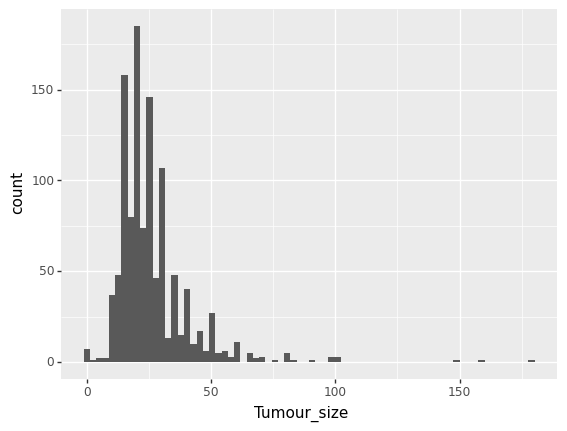

<ggplot: (-9223371900156157056)>

In [10]:
(
ggplot(metabric, aes("Tumour_size"))
    + geom_histogram()
)

To perform a log-transformation on this data, we can use some functions from numpy:
- **log()** = log-transform with natural logarithm
- **log2()** = log-transform with base 2
- **log10()** = log-transform with base 10
All of these functions return a numpy array of transformed values. To retain the original (untransformed) data, we can add these transformed values to the metabric dataframe as a new column:

In [11]:
metabric["Tumour_size_log2"] = np.log2(metabric["Tumour_size"])
metabric["Tumour_size_log10"] = np.log10(metabric["Tumour_size"])

# Modelling

## Linear regression

## Logistic regression